In [19]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  


Populating the interactive namespace from numpy and matplotlib


In [20]:
import hist_bench
reload(hist_bench)
import gen_fns
reload(gen_fns)
from gen_fns import get_data
from gen_fns import ls_fit
from hist_bench import calc_pursuit
from hist_bench import get_pes
from hist_bench import calc_weights

bin_edges = [0,1,2,3,4,5,6,7,8,9,10]

In [21]:
#path = "/Users/mbmcgarry/git/data_analysis/data/v1.3/multi_lat/"
#file = "44_state.tsv"

path = "/Users/mbmcgarry/git/historical_prolif/"
file = "historical_factors.csv"

factor_weights = calc_weights(path+file)
print factor_weights

#factor_weights = np.array([0.15, 0.1, 0.16, 0.09, 0.1,0.1, 0.15, 0.15])

countries, col_names, all_vals = get_data(path+file, n_header=1, col_list=range(2,11))
status = all_vals[:,0]
raw_data = np.delete(all_vals, 0, 1)

[ 0.12  0.08  0.18  0.1   0.05  0.21  0.26  0.  ]


In [22]:
all_pe_vals = calc_pursuit(raw_data, factor_weights)
pursue_states, pursue_pes = get_pes(countries, all_pe_vals, "Pursue")
prolif_states, prolif_pes = get_pes(countries, all_pe_vals, "Prolif")

pursue_hist, edges_pur = np.histogram(pursue_pes,bins=bin_edges)
prolif_hist, edges_pro = np.histogram(prolif_pes,bins=bin_edges)
all_hist, edges_a = np.histogram(all_pe_vals, bins=bin_edges)


In [23]:
frac_pursue=np.nan_to_num(pursue_hist.astype(float)/all_hist.astype(float))
#frac_pursue=np.nan_to_num(pursue_hist.astype(float)/190)
frac_prolif=np.nan_to_num(prolif_hist.astype(float)/all_hist.astype(float))
prolif_pursue=np.nan_to_num(prolif_hist.astype(float)/pursue_hist.astype(float))

denom_pursue = np.full(len(pursue_hist),pursue_hist.sum()) 
frac_pursue_weight = pursue_hist/denom_pursue

denom_succ = np.full(len(prolif_pursue),prolif_pursue.sum()) 
frac_succ_weight = prolif_pursue/denom_succ

weights  [ 0.    0.    0.    0.03  0.1   0.17  0.38  0.17  0.14  0.  ]


array([ 0.  ,  0.  ,  0.  ,  0.2 ,  0.33,  0.83,  0.79,  1.  ,  1.  ,  0.  ])

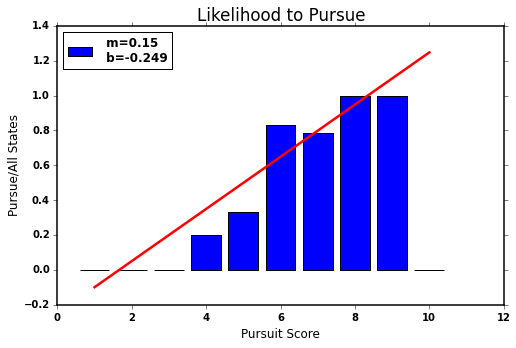

In [62]:
barwidth=0.8
index = np.delete(bin_edges,-1) + (1-barwidth)
xvals = np.arange(1,11)
int_pursue, m_pursue = ls_fit(xvals, frac_pursue, frac_pursue_weight)
line_spec_str = " m="+str(round(m_pursue,3))+ "\n b=" + str(round(int_pursue,3))
line_vals = m_pursue*xvals + int_pursue

plt.bar(index+(barwidth/2), frac_pursue, barwidth, label=line_spec_str)
plt.plot(xvals, line_vals, color = 'red')

plt.title("Likelihood to Pursue")
plt.xlabel("Pursuit Score")
plt.ylabel("Pursue/All States")
plt.legend(loc='best')

frac_pursue

In [68]:
time_frac = 1./70
for i in range(len(frac_pursue)):
    cur_val = line_vals[i]
    if (cur_val >= 1) or (xvals[i] == 10):
        cur_val = 0.999999999
    elif (cur_val < 0):
        cur_val = 0
    likelihood = (1.0 - math.pow((1.0-cur_val), time_frac))
    print "score: ",xvals[i], " frac: ", frac_pursue[i], "likely: ", likelihood

score:  1  frac:  0.0 likely:  0.0
score:  2  frac:  0.0 likely:  0.000740217915709
score:  3  frac:  0.0 likely:  0.0031849923502
score:  4  frac:  0.2 likely:  0.00612957043936
score:  5  frac:  0.333333333333 likely:  0.0098351492688
score:  6  frac:  0.833333333333 likely:  0.0148444264471
score:  7  frac:  0.785714285714 likely:  0.022631654124
score:  8  frac:  1.0 likely:  0.0414108403475
score:  9  frac:  1.0 likely:  0.256247272735
score:  10  frac:  0.0 likely:  0.256247272735


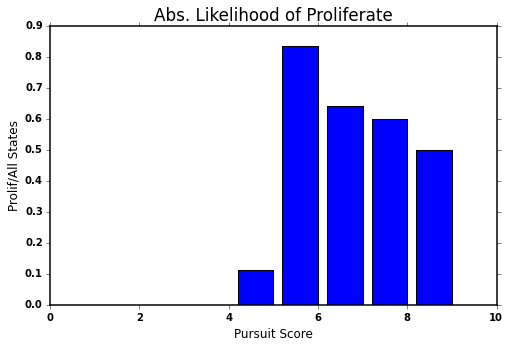

In [54]:
barwidth=0.8
plt.bar(index, frac_prolif, barwidth)

plt.title("Abs. Likelihood of Proliferate")
plt.xlabel("Pursuit Score")
plt.ylabel("Prolif/All States")


weights  [ 0.    0.    0.    0.    0.1   0.31  0.25  0.18  0.15  0.  ]


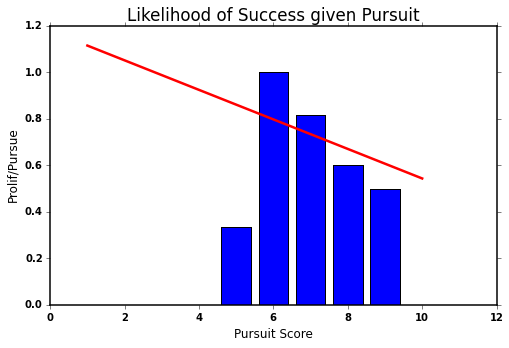

In [26]:
barwidth=0.8

int_succ, m_succ = ls_fit(xvals, prolif_pursue, frac_succ_weight)

plt.bar(index+(barwidth/2), prolif_pursue, barwidth)
plt.plot(xvals, m_succ*xvals + int_succ, color = 'red')

plt.title("Likelihood of Success given Pursuit")
plt.xlabel("Pursuit Score")
plt.ylabel("Prolif/Pursue")



In [27]:
# Time to acquire. States that never succeeded have negative years in the database, set them all to 30yrs
# (longest time to successfully acquire was 26yrs, all failed attempts were greater than 30yrs from 2015
# except Syria (15yrs) 

from hist_bench import time_to_acquire

# returns time to acquire for all states that have attempted pursuit
acq_times = time_to_acquire()

pursuit_scores = []
corr_acq_times = []


for idx, cur_state in enumerate(countries):
    if (cur_state in acq_times) and (status[idx] == 2):
        cur_time = acq_times[cur_state]
        if (cur_time >= 0):
            corr_acq_times.append(cur_time)
            pursuit_scores.append(all_pe_vals[idx])
            print "State ",cur_state, " Score ", all_pe_vals[idx], " Time ", cur_time
#        To look at the distribution of countries that pursued but never acquired
#        else:
#            corr_acq_times.append(-1*cur_time)
#            pursuit_scores.append(all_pe_vals[idx])
#            print "State ",cur_state, " Score ", all_pe_vals[idx], " Time ", cur_time


int_time, m_time = ls_fit(np.asarray(pursuit_scores), np.asarray(corr_acq_times))


Belarus 0.0
Germany 0.0
Japan 0.0
Armenia 0.0
Belgium 0.0
Bulgar 0.0
Canada 0.0
Czech-R 0.0
Finland 0.0
Hungary 0.0
Kazak 0.0
Lithua 0.0
Mexico 0.0
Nether 0.0
Saudi-A 0.0
Slovak 0.0
Spain 0.0
Ukraine 0.0
UAE 0.0
Sweden 0.0
Switz 0.0
Indones 0.0
Algeria 0.0
Romania 0.0
Sweden 1.0
Switz 1.0
Indones 1.0
Algeria 1.0
Romania 1.0
Austral 2.0
Egypt 2.0
Libya 2.0
S-Korea 2.0
Argent 2.0
Brazil 2.0
Iraq 2.0
Iran 2.0
Syria 2.0
US 2.0
State  US  Score  6.4872  Time  3
USSR 2.0
State  USSR  Score  8.859  Time  4
UK 2.0
State  UK  Score  5.8464  Time  5
France 2.0
State  France  Score  6.7933  Time  6
China 2.0
State  China  Score  6.3277  Time  9
Israel 2.0
State  Israel  Score  6.1962  Time  9
India 2.0
State  India  Score  6.4368  Time  10
Pakist 2.0
State  Pakist  Score  5.2904  Time  15
S-Afric 2.0
State  S-Afric  Score  5.8925  Time  5
N-Korea 2.0
State  N-Korea  Score  7.7035  Time  26
US 3.0
USSR 3.0
UK 3.0
France 3.0
China 3.0
Israel 3.0
India 3.0
Pakist 3.0
S-Afric 3.0
N-Korea 3.0
weights 

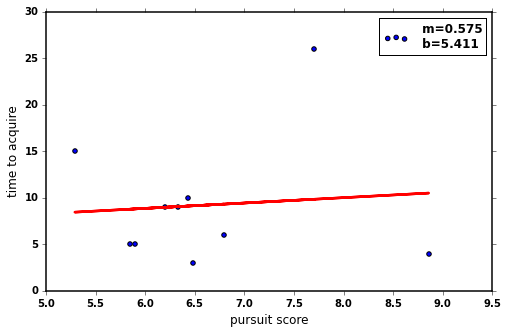

In [28]:
line_spec_str = " m="+str(round(m_time,3))+ "\n b=" + str(round(int_time,3))

plt.scatter(pursuit_scores, corr_acq_times, label=line_spec_str)
plt.xlabel('pursuit score')
plt.ylabel('time to acquire')
plt.plot(pursuit_scores, m_time*np.asarray(pursuit_scores) + int_time, color = 'red')
plt.legend(loc='best')


In [29]:
# NOT WORKING

# Linear Fit
import scipy as sp
from gen_fns import fit_exp_linear

C0 = 20
# Linear Fit (Note that we have to provide the y-offset ("C") value!!
A, K = fit_exp_linear(np.asarray(pursuit_scores), np.asarray(corr_acq_times), C0)
fit_y= A * np.exp(K * np.asarray(pursuit_scores)) + C0

